In [77]:
import sqlite3
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import all libraries needed for this project

In [78]:
conn = sqlite3.connect('C:/Users/Andy/Documents/vscode/Vision_Tradingbot/andy/trading_data.db')

setup a connection to the stored database.
As of now march 9th, the database is stored locally, however the future plan is to host this
database on AWS using RDS MySQL

In [79]:
table_name = 'trading_data'
query = f"SELECT * FROM {table_name}"
df = pd.read_sql_query(query, conn)
df.replace('null', pd.NA, inplace = True)
df.dropna(inplace = True)
df

,id,image_data,tradable,trend,phase,after
0,5,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,up,pullback,continues pull back
1,6,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,continues trend
2,7,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,breaks structure and reverses
3,8,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,consolidation,continues trend
4,9,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,continues trend
...,...,...,...,...,...,...
295,300,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,consolidates/no trend
297,302,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,consolidation,breaks structure and reverses
298,303,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,up,pullback,continues pull back
299,304,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,continues trend


read database as pandas dataframe using a select all query then drop null values.
display dataframe.

In [80]:
def blob_to_image(blob):
    return np.array(Image.open(BytesIO(blob)))

df['images'] = df['image_data'].apply(blob_to_image)
df

,id,image_data,tradable,trend,phase,after,images
0,5,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,up,pullback,continues pull back,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,6,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,continues trend,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,7,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,breaks structure and reverses,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,8,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,consolidation,continues trend,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,9,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,continues trend,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...
295,300,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,consolidates/no trend,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
297,302,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,consolidation,breaks structure and reverses,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
298,303,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,up,pullback,continues pull back,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
299,304,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,yes,down,pullback,continues trend,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


convert BLOB into a np array image representation as a new column
Confrim that the new column with right data is present

In [81]:
images = np.array(df['images'])
labels = df[['trend', 'phase', 'after']].values

create two numpy arrays consisting of the labels and the image

In [82]:
print(images[0])
print(labels[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[224 227 235]
  [224 227 235]
  [224 227 235]
  ...
  [175 178 187]
  [175 178 187]
  [175 178 187]]

 [[224 227 235]
  [224 227 235]
  [224 227 235]
  ...
  [184 187 196]
  [184 187 196]
  [184 187 196]]

 ...

 [[224 227 235]
  [224 227 235]
  [224 227 235]
  ...
  [233 233 233]
  [233 233 233]
  [233 233 233]]

 [[224 227 235]
  [224 227 235]
  [224 227 235]
  ...
  [233 233 233]
  [233 233 233]
  [233 233 233]]

 [[224 227 235]
  [224 227 235]
  [224 227 235]
  ...
  [233 233 233]
  [233 233 233]
  [233 233 233]]]
['up' 'pullback' 'continues pull back']


confirm the contents of the numpy array are correctly pulled from the dataframe

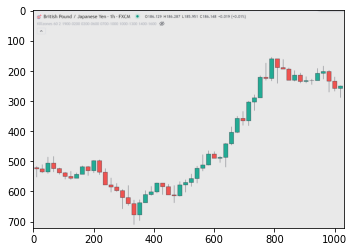

In [83]:
sample_image = images[0]
plt.imshow(sample_image)

confirm that the numpy array representation of the image converted from a BLOB was correctly pulled
from the dataframe into the numpy array.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

split the dataset into 80% training while 20% is used for testing

In [96]:

X_train = X_train / 255.0
X_test = X_test / 255.0

normalize the pixel values by dividing by 255.

In [97]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (1030, 721, 3)))